# 결정 트리

In [2]:
import pandas as pd 
wine = pd.read_csv('https://bit.ly/wine-date')

In [3]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

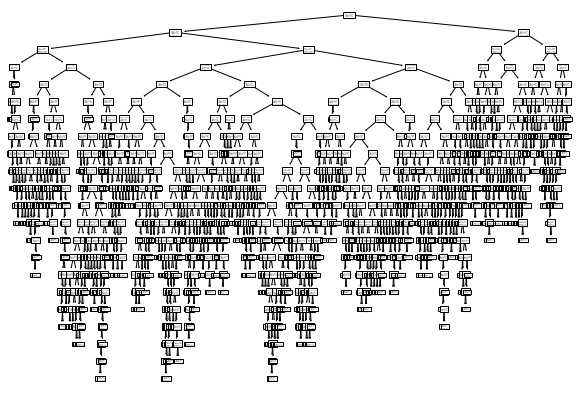

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

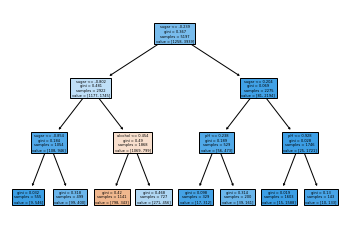

In [12]:
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 교차 검증과 그리드 서치

## 검증 세트

In [13]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(val_input, val_target))

0.864423076923077


In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00574064, 0.005445  , 0.00544786, 0.00495195, 0.00452709]), 'score_time': array([0.00054622, 0.00050998, 0.00054502, 0.00037503, 0.00032878]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [17]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [18]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


## 하이퍼파라미터 튜닝

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs=GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)

gs.fit(train_input, train_target)

dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [20]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [21]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


# 트리의 앙상블
## 랜덤 포레스트

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

In [24]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [26]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


## 엑스트라 트리

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

In [29]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [30]:
et.fit(train_input, train_target)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

## 그라디언트 부스팅

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=1)

In [32]:
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [33]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)

scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [34]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(train_input, train_target)
print(gb.feature_importances_)

0.9464595437171814 0.8780082549788999
[0.15872278 0.68010884 0.16116839]
